In [1]:
import os
from glob import glob
import psutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm 

In [2]:
risultati = [y for x in os.walk("final_joined_result/") for y in glob(os.path.join(x[0], '*.csv'))]
risultati[:5]

['final_joined_result/2d-20c-no0_y.zip CenterParTree2.csv',
 'final_joined_result/triangle2_y.zip-4_True_k kmeans+dt.csv',
 'final_joined_result/s-set2_y.zip PrincipalParTree.csv',
 'final_joined_result/cure-t1-2000n-2D_y.zip PrincipalParTree.csv',
 'final_joined_result/zelnik5_y.zip ImpurityParTree2.csv']

In [3]:
risultati_groupby_alg = dict()
risultati_groupby_dataset = dict()

for filename in risultati:
    alg = filename.split(" ")[-1][:-4]
    dataset = filename.split(" ")[0].split("\\")[-1][:-4]
    
    if alg not in risultati_groupby_alg:
        risultati_groupby_alg[alg] = []
    if dataset not in risultati_groupby_dataset:
        risultati_groupby_dataset[dataset] = []
    
    risultati_groupby_alg[alg].append(filename)
    risultati_groupby_dataset[dataset].append(filename)

In [4]:
res_values_uns = ["time", "silhouette", "calinski_harabasz", "davies_bouldin"]
res_values_sup = ["r_score", "adj_rand", "mut_info_score", "adj_mutual_info_score", "norm_mutual_info_score",
                                 "homog_score", "complete_score", "v_msr_score", "fwlks_mallows_score"]
res_values_all = res_values_uns + res_values_sup

In [33]:
df = pd.DataFrame()
lista = []

datasets = set()
algorithms = set()

for filename in risultati:
    alg = filename.split(" ")[-1][:-4]
    dataset = filename.split(" ")[0].split("/")[-1][:-4].replace(".zip", "").replace("-", "")
    
    skip = False
    for d in ["german_credit_y", "ionosphere_y", "home", "iris", "wdbc_y", "vehicle_y", "titanic_y", "wine"]:
        if d in dataset:
            skip = True
    if skip: continue
        
    
    datasets.add(dataset)
    algorithms.add(alg)
    
    lista.append(pd.read_csv(filename))
    
    lista[-1]["alg"] = alg
    if "wine" in dataset:
        lista[-1]["dataset"] = "wine"
    elif "home" in dataset:
        lista[-1]["dataset"] = "home"
    else:
        lista[-1]["dataset"] = dataset.split("_y")[0]+"_y"
    
df = pd.concat(lista)

df.columns

Index(['max_depth', 'max_nbr_clusters', 'min_samples_leaf',
       'min_samples_split', 'max_nbr_values', 'max_nbr_values_cat', 'bic_eps',
       'random_state', 'metric_con', 'metric_cat', 'time', 'silhouette',
       'calinski_harabasz', 'davies_bouldin', 'r_score', 'adj_rand',
       'mut_info_score', 'adj_mutual_info_score', 'norm_mutual_info_score',
       'homog_score', 'complete_score', 'v_msr_score', 'fwlks_mallows_score',
       'alg', 'dataset', 'n_clusters', 'labels_as_tree_leaves', 'init',
       'n_init', 'max_iter', 'tol', 'verbose', 'copy', 'algorithm',
       'criterion', 'splitter', 'min_weight_fraction_leaf', 'max_features',
       'max_leaf_nodes', 'min_impurity_decrease', 'class_weight', 'ccp_alpha',
       'n_components', 'oblique_splits', 'max_oblique_features',
       'criteria_clf', 'criteria_reg', 'number_clusters', 'bisecting_strategy',
       'eps', 'min_samples', 'metric', 'n_jobs', 'threshold',
       'branching_factor', 'max_eps', 'amount_initial_centers',

In [34]:
datasets

{'2d20cno0_y',
 '2d20cno0_y10_Tr',
 '2d20cno0_y12_Tr',
 '2d20cno0_y2_Tr',
 '2d20cno0_y4_Tr',
 '2d20cno0_y6_Tr',
 '2d20cno0_y8_Tr',
 '2d3cno123_y',
 '2d3cno123_y10_Tr',
 '2d3cno123_y12_Tr',
 '2d3cno123_y2_Tr',
 '2d3cno123_y4_Tr',
 '2d3cno123_y6_Tr',
 '2d3cno123_y8_Tr',
 '2d4c_y',
 '2d4c_y10_Tr',
 '2d4c_y12_Tr',
 '2d4c_y2_Tr',
 '2d4c_y4_Tr',
 '2d4c_y6_Tr',
 '2d4c_y8_Tr',
 '2d4cno9_y',
 '2d4cno9_y10_Tr',
 '2d4cno9_y12_Tr',
 '2d4cno9_y2_Tr',
 '2d4cno9_y4_Tr',
 '2d4cno9_y6_Tr',
 '2d4cno9_y8_Tr',
 '2dd31_y',
 '2dd31_y10_Tr',
 '2dd31_y12_Tr',
 '2dd31_y2_Tr',
 '2dd31_y4_Tr',
 '2dd31_y6_Tr',
 '2dd31_y8_Tr',
 'aggregation_y',
 'aggregation_y10_Tr',
 'aggregation_y12_Tr',
 'aggregation_y2_Tr',
 'aggregation_y4_Tr',
 'aggregation_y6_Tr',
 'aggregation_y8_Tr',
 'curet02000n2D_y',
 'curet02000n2D_y10_Tr',
 'curet02000n2D_y12_Tr',
 'curet02000n2D_y2_Tr',
 'curet02000n2D_y4_Tr',
 'curet02000n2D_y6_Tr',
 'curet02000n2D_y8_Tr',
 'curet12000n2D_y',
 'curet12000n2D_y10_Tr',
 'curet12000n2D_y12_Tr',
 'cure

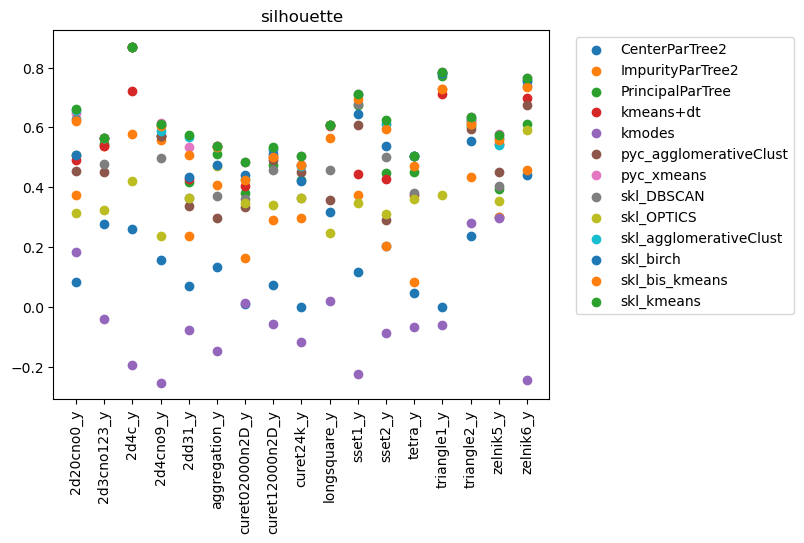

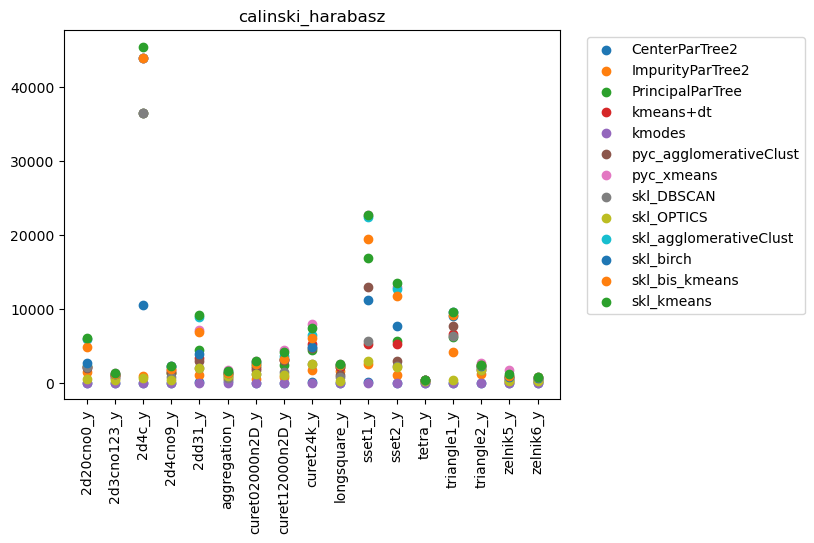

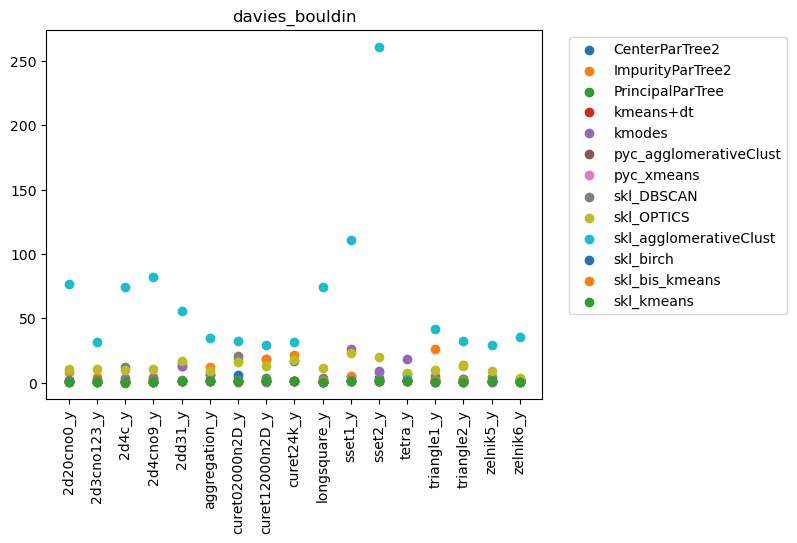

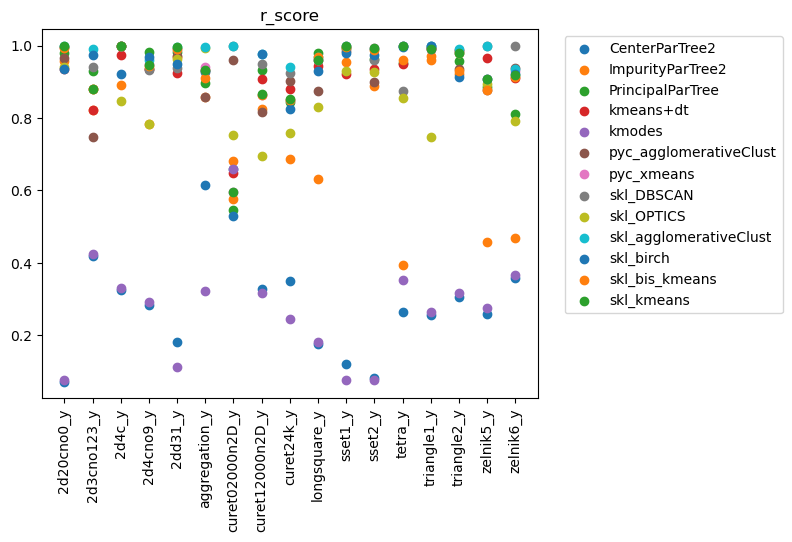

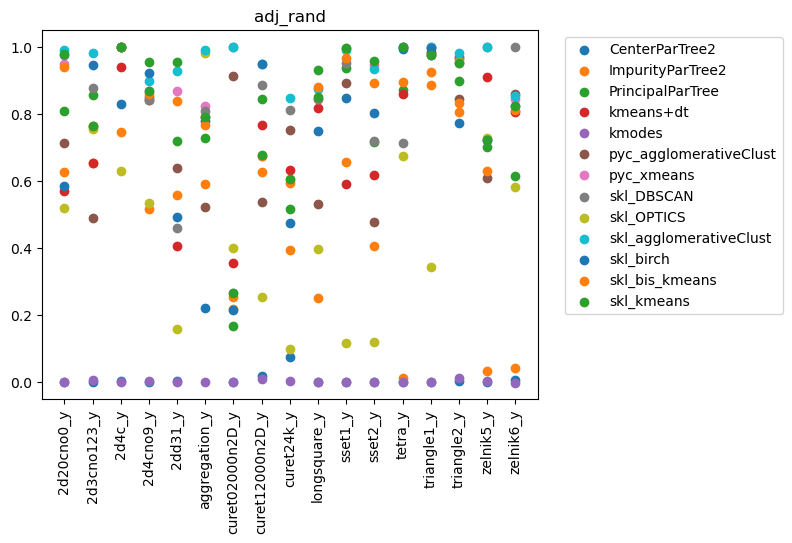

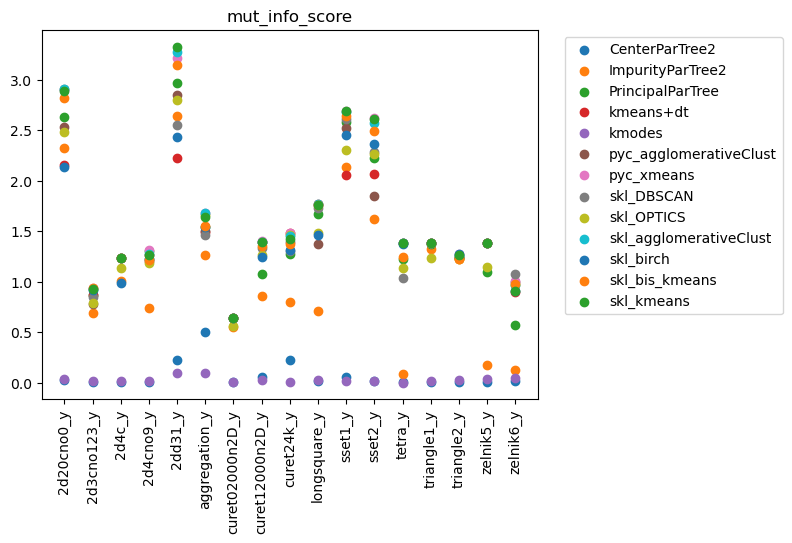

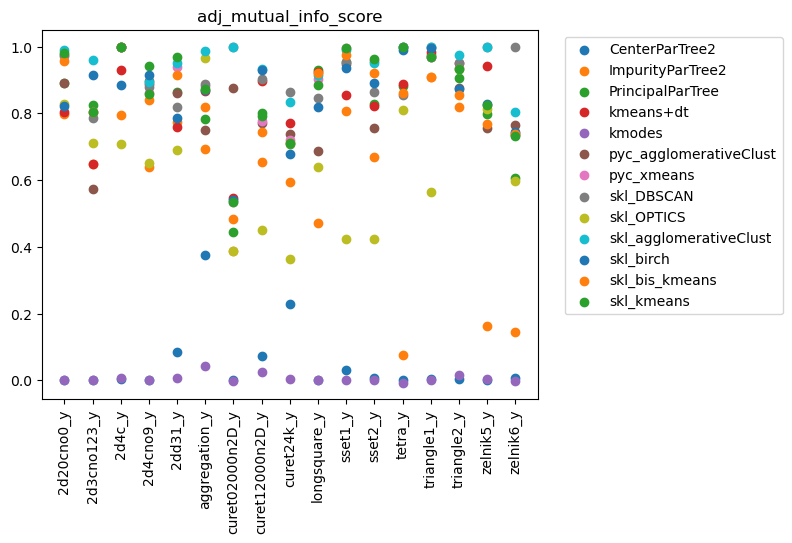

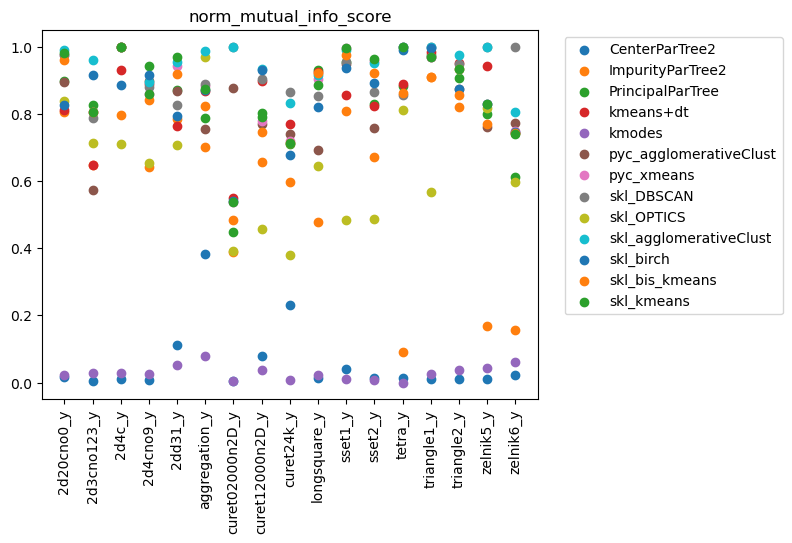

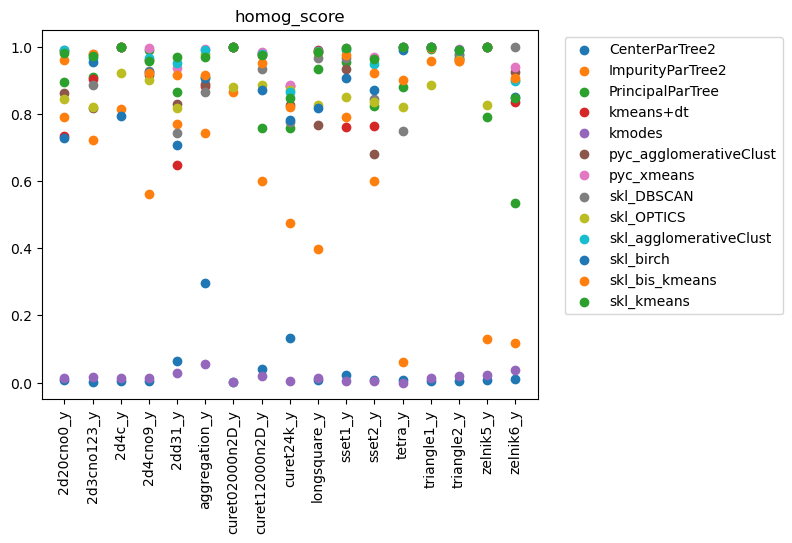

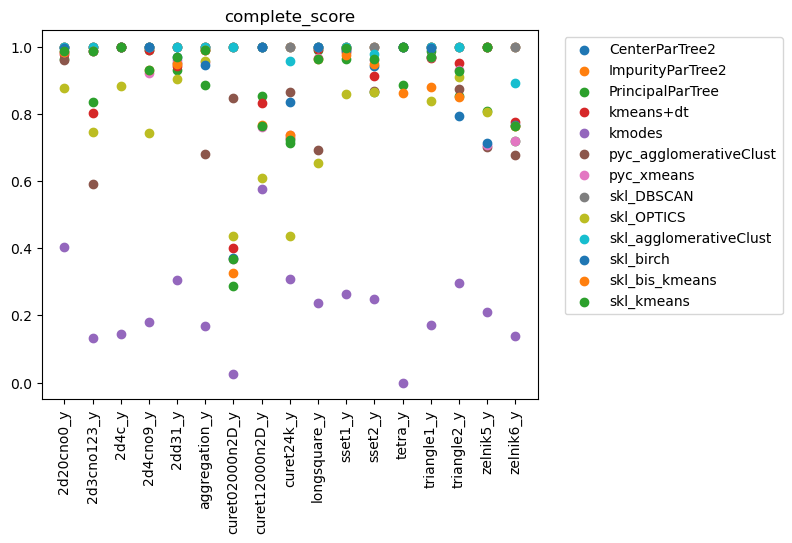

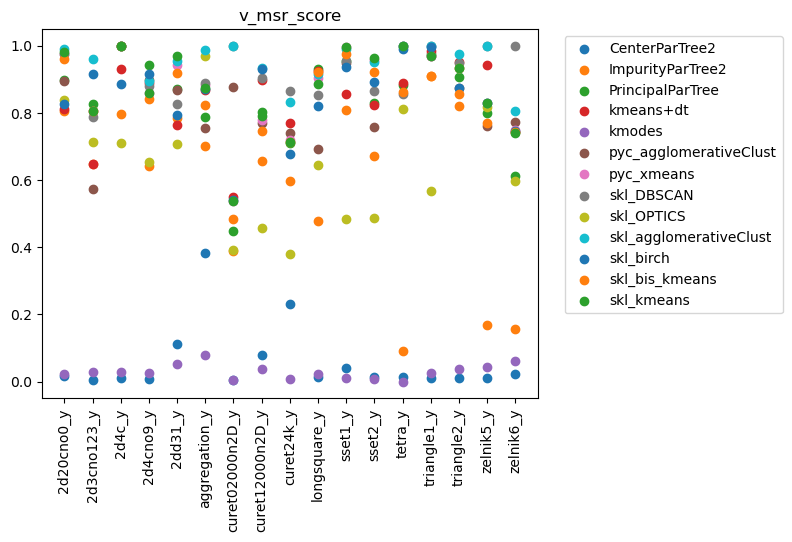

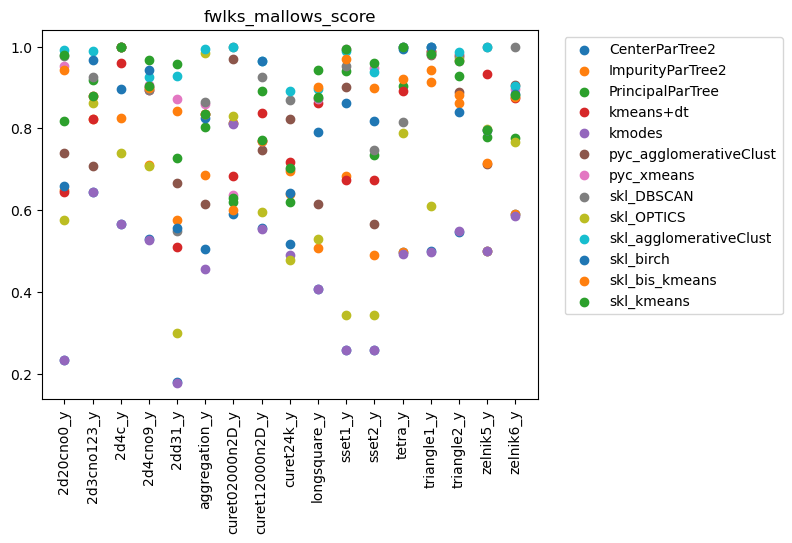

In [35]:
for col in res_values_all:
    if col == "time":
        continue

    df_plot = df.groupby(by=["dataset", "alg"])[[col, "time"]].max().reset_index()
    
    #df_plot = df_plot[df_plot.alg.isin(algoritmi_grafico)]

    for alg in df_plot.alg.unique():
        plt.scatter(df_plot[df_plot.alg == alg].dataset, 
                    df_plot[df_plot.alg == alg][col], 
                    label=alg, 
                    #s=df_plot[df_plot.alg == alg].time
                   )

    plt.title(col)

    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

    plt.xticks(rotation=90)

    plt.show()

In [37]:
df.head()

,max_depth,max_nbr_clusters,min_samples_leaf,min_samples_split,max_nbr_values,max_nbr_values_cat,bic_eps,random_state,metric_con,metric_cat,...,eps,min_samples,metric,n_jobs,threshold,branching_factor,max_eps,amount_initial_centers,kmax,linkage
0,10.0,20.0,30.0,50.0,1000.0,100.0,0.0,42.0,cos,jaccard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10.0,20.0,30.0,50.0,1000.0,100.0,0.1,42.0,cos,jaccard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.0,20.0,30.0,50.0,1000.0,100.0,0.2,42.0,cos,jaccard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.0,20.0,30.0,50.0,1000.0,20.0,0.0,42.0,cos,jaccard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10.0,20.0,30.0,50.0,1000.0,20.0,0.1,42.0,cos,jaccard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df.sort_values(['dataset', 'alg', 'silhouette'], ascending=False).groupby(['dataset', 'alg']).nth(0)

max_depth  max_nbr_clusters  \
dataset    alg                                                   
2d20cno0_y CenterParTree2                2.0              20.0   
           ImpurityParTree2             10.0               2.0   
           PrincipalParTree             10.0              20.0   
           kmeans+dt                     NaN               NaN   
           kmodes                        NaN               NaN   
...                                      ...               ...   
zelnik6_y  skl_OPTICS                    NaN               NaN   
           skl_agglomerativeClust        NaN               NaN   
           skl_birch                     NaN               NaN   
           skl_bis_kmeans                NaN               NaN   
           skl_kmeans                    NaN               NaN   

                                   min_samples_leaf  min_samples_split  \
dataset    alg                                                           
2d20cno0_y CenterParTree2                      30.0               50.0   
           ImpurityParTree2                    30.0               50.0   
           PrincipalParTree                    30.0               50.0   
           kmeans+dt                           50.0               30.0   
           kmodes                               NaN                NaN   
...                                             ...                ...   
zelnik6_y  skl_OPTICS                           NaN                NaN   
           skl_agglomerativeClust               NaN                NaN   
           skl_birch                            NaN                NaN   
           skl_bis_kmeans                       NaN                NaN   
           skl_kmeans                           NaN                NaN   

                                   max_nbr_values  max_nbr_values_cat  \
dataset    alg                                                          
2d20cno0_y CenterParTree2                  1000.0               100.0   
           ImpurityParTree2                1000.0               100.0   
           PrincipalParTree                1000.0               100.0   
           kmeans+dt                          NaN                 NaN   
           kmodes                             NaN                 NaN   
...                                           ...                 ...   
zelnik6_y  skl_OPTICS                         NaN                 NaN   
           skl_agglomerativeClust             NaN                 NaN   
           skl_birch                          NaN                 NaN   
           skl_bis_kmeans                     NaN                 NaN   
           skl_kmeans                         NaN                 NaN   

                                   bic_eps  random_state metric_con  \
dataset    alg                                                        
2d20cno0_y CenterParTree2              0.1          42.0        cos   
           ImpurityParTree2            0.0          42.0        NaN   
           PrincipalParTree            0.0          42.0        NaN   
           kmeans+dt                   NaN          42.0        NaN   
           kmodes                      NaN          42.0        NaN   
...                                    ...           ...        ...   
zelnik6_y  skl_OPTICS                  NaN           NaN        NaN   
           skl_agglomerativeClust      NaN           NaN        NaN   
           skl_birch                   NaN           NaN        NaN   
           skl_bis_kmeans              NaN          42.0        NaN   
           skl_kmeans                  NaN          42.0        NaN   

                                  metric_cat  ...  eps  min_samples  \
dataset    alg                                ...                     
2d20cno0_y CenterParTree2            jaccard  ...  NaN          NaN   
           ImpurityParTree2              NaN  ...  NaN          NaN   
           PrincipalParTree              NaN  ...  NaN 

In [53]:
df.groupby(['dataset', 'alg']).filter(lambda x: True)#.nth(100)  #[['dataset', 'alg', 'silhouette']]

,max_depth,max_nbr_clusters,min_samples_leaf,min_samples_split,max_nbr_values,max_nbr_values_cat,bic_eps,random_state,metric_con,metric_cat,...,eps,min_samples,metric,n_jobs,threshold,branching_factor,max_eps,amount_initial_centers,kmax,linkage
0,10.0,20.0,30.0,50.0,1000.0,100.0,0.0,42.0,cos,jaccard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10.0,20.0,30.0,50.0,1000.0,100.0,0.1,42.0,cos,jaccard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.0,20.0,30.0,50.0,1000.0,100.0,0.2,42.0,cos,jaccard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.0,20.0,30.0,50.0,1000.0,20.0,0.0,42.0,cos,jaccard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10.0,20.0,30.0,50.0,1000.0,20.0,0.1,42.0,cos,jaccard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df.groupby(['dataset', 'alg'])['silhouette'].transform(max)

0    0.0816
1    0.0816
2    0.0816
3    0.0816
4    0.0816
      ...  
1    0.5069
2    0.5069
3    0.5069
4    0.5069
5    0.5069
Name: silhouette, Length: 585243, dtype: float64

In [22]:
idx = df.groupby(['dataset', 'alg'])['silhouette'].transform(max) == df['silhouette']

In [23]:
df.loc[idx][['dataset', 'alg', 'silhouette']]

,dataset,alg,silhouette
217,2d20cno0_y,CenterParTree2,0.0816
218,2d20cno0_y,CenterParTree2,0.0816
220,2d20cno0_y,CenterParTree2,0.0816
221,2d20cno0_y,CenterParTree2,0.0816
229,2d20cno0_y,CenterParTree2,0.0816
...,...,...,...
3355,curet24k_y,PrincipalParTree,0.4236
6,2d4cno9_y,kmodes,-0.2537
7,2d4cno9_y,kmodes,-0.2537
8,2d4cno9_y,kmodes,-0.2537


In [32]:
df.dataset.unique()

array(['2d20cno0_y', 'triangle2_y', 'sset2_y', 'curet12000n2D_y',
       'zelnik5_y', 'zelnik6_y', '2d4cno9_y', '2dd31_y', 'aggregation_y',
       'longsquare_y', '2d3cno123_y', 'triangle1_y', 'wine', 'tetra_y',
       'curet24k_y', 'sset1_y', '2d4c_y', 'titanic_y', 'curet02000n2D_y'],
      dtype=object)

In [24]:
df_subset_list = []

for dataset, alg, silhouette in tqdm(df.groupby(['dataset', 'alg'])['silhouette'].max().reset_index().values):
    df_subset = df[(df.dataset == dataset) & (df.alg == alg) & (df.silhouette == silhouette)]
    df_subset = df_subset.sort_values(by=res_values_uns).head(1)
    df_subset_list.append(df_subset)

df_subset = pd.concat(df_subset_list)
df_subset[["silhouette", "alg", "dataset"]].head()

  0%|          | 0/247 [00:00<?, ?it/s]

,silhouette,alg,dataset
256,0.0816,CenterParTree2,2d20cno0_y
29646,0.3746,ImpurityParTree2,2d20cno0_y
21468,0.5090,PrincipalParTree,2d20cno0_y
7,0.4926,kmeans+dt,2d20cno0_y
11,0.1823,kmodes,2d20cno0_y


In [57]:
df_subset = df.sort_values(['dataset', 'alg', 'silhouette'], ascending=False).groupby(['dataset', 'alg']).nth(0).reset_index()

df_subset["rank_per_dataset"] = df_subset.groupby("dataset")["silhouette"].rank(ascending=False).astype(int)

df_subset.sort_values(["dataset", "rank_per_dataset"])[["rank_per_dataset", "silhouette", "alg", "dataset"]]

,rank_per_dataset,silhouette,alg,dataset
12,1,0.6613,skl_kmeans,2d20cno0_y
9,2,0.6578,skl_agglomerativeClust,2d20cno0_y
6,3,0.6479,pyc_xmeans,2d20cno0_y
7,4,0.6268,skl_DBSCAN,2d20cno0_y
11,5,0.6218,skl_bis_kmeans,2d20cno0_y
...,...,...,...,...
210,9,0.6111,PrincipalParTree,zelnik6_y
216,10,0.5909,skl_OPTICS,zelnik6_y
209,11,0.4560,ImpurityParTree2,zelnik6_y
208,12,0.4394,CenterParTree2,zelnik6_y


In [58]:
df_agg = df_subset.groupby("alg")[res_values_all].agg(["mean", "std"])

df_agg.head()

time            silhouette           calinski_harabasz  \
                       mean        std       mean       std              mean   
alg                                                                             
CenterParTree2    14.307651  17.054668   0.160265  0.129150         14.842941   
ImpurityParTree2   1.968589   4.114197   0.387218  0.170828       1033.899965   
PrincipalParTree   0.043362   0.048093   0.544953  0.135394       5220.153676   
kmeans+dt          0.186741   0.333429   0.535124  0.108182       4373.481824   
kmodes             0.129294   0.107336  -0.045694  0.166066          1.451924   

                              davies_bouldin             r_score            \
                          std           mean       std      mean       std   
alg                                                                          
CenterParTree2      47.352919       1.659371  2.628574  0.272959  0.173690   
ImpurityParTree2  1074.329853       1.031165  0.646124  0.646018  0.273972   
PrincipalParTree  8925.821330       0.647524  0.220571  0.853588  0.153693   
kmeans+dt         7888.201755       0.655259  0.173128  0.826676  0.120356   
kmodes               1.279674       2.583471  3.635389  0.250441  0.153004   

                  ... norm_mutual_info_score           homog_score            \
                  ...                   mean       std        mean       std   
alg               ...                                                          
CenterParTree2    ...               0.026988  0.091008    0.017971  0.063637   
ImpurityParTree2  ...               0.458753  0.323522    0.404018  0.328829   
PrincipalParTree  ...               0.754106  0.166480    0.748835  0.189897   
kmeans+dt         ...               0.712212  0.148203    0.675476  0.230935   
kmodes            ...               0.002735  0.002452    0.001394  0.001266   

                 complete_score           v_msr_score            \
                           mean       std        mean       std   
alg                                                               
CenterParTree2         0.329618  0.291635    0.026988  0.091008   
ImpurityParTree2       0.643694  0.309792    0.458753  0.323522   
PrincipalParTree       0.817276  0.183422    0.754106  0.166480   
kmeans+dt              0.845806  0.163814    0.712212  0.148203   
kmodes                 0.208053  0.132613    0.002735  0.002452   

                 fwlks_mallows_score            
                                mean       std  
alg                                             
CenterParTree2              0.473259  0.161950  
ImpurityParTree2            0.632618  0.186259  
PrincipalParTree            0.757541  0.161753  
kmeans+dt                   0.701312  0.196821  
kmodes                      0.471041  0.162733  

[5 rows x 26 columns]

In [59]:
df_subset.groupby("alg")[["rank_per_dataset"]].agg(
    total=("rank_per_dataset", len),
    rank_list=("rank_per_dataset", lambda x: len(x[x == 1]))
)

,total,rank_list
alg,,
CenterParTree2,17,0
ImpurityParTree2,17,0
PrincipalParTree,17,0
kmeans+dt,17,0
kmodes,17,0
pyc_agglomerativeClust,17,0
pyc_xmeans,17,7
skl_DBSCAN,17,0
skl_OPTICS,17,0


In [60]:
dfs_win = []

metriche = dict([#Ascending?
    ('silhouette', False), #max
    ('time', True), #min
    ('calinski_harabasz', False),
    ('davies_bouldin', True),
    ('r_score', False),
    ('adj_rand', False),
    ('mut_info_score', False),
    ('adj_mutual_info_score', False),
    ('norm_mutual_info_score', False),
    ('homog_score', True),
    ('complete_score', False),
    ('v_msr_score', False),
    ('fwlks_mallows_score', False)
])

def getWin(metrica):
    ascending = metriche[metrica]
    df_tmp = df_subset[["alg", "dataset", metrica]].copy()
    df_tmp["rank"] = df_subset.groupby("dataset")[metrica].rank(ascending=ascending, na_option="top" if ascending else "bottom").astype(int)
    #todo rank
    
    dfs_win.append(df_tmp)
    
    #print(metrica)
    print(df_tmp.sort_values(["dataset", metrica], ascending=ascending)[[metrica, "rank"]].head())
    
    return df_tmp.groupby("alg")[["rank"]].agg(
        c=("rank", len),
        win=("rank", lambda x: len(x[x == 1]))
    )

In [61]:
for metrica in res_values_all:
    df_tmp = getWin(metrica)
    df_agg[(metrica, "win")] = df_tmp.win
    df_agg[(metrica, "c")] = df_tmp.c

df_agg[df_agg.columns.sort_values()]

        time  rank
7   0.007109     1
6   0.019882     2
10  0.022473     3
9   0.027853     4
3   0.062153     5
     silhouette  rank
214      0.7648     1
220      0.7648     1
217      0.7560     3
218      0.7543     4
215      0.7383     5
     calinski_harabasz  rank
214           641.7966     1
220           641.7966     1
218           576.4192     3
217           573.9990     4
219           465.1163     5
    davies_bouldin  rank
12          0.4755     1
9           0.4773     2
6           0.5121     3
5           0.6226     4
11          0.6270     5
     r_score  rank
215   0.9152     1
217   0.9115     2
218   0.9034     3
214   0.8981     4
220   0.8981     4
     adj_rand  rank
215    0.8130     1
217    0.8065     2
218    0.7896     3
214    0.7787     4
220    0.7787     4
     mut_info_score  rank
215          0.8720     1
217          0.8507     2
211          0.8212     3
218          0.8212     3
214          0.8077     5
     adj_mutual_info_score  rank
217    

adj_mutual_info_score                         adj_rand  \
                                           c      mean       std win        c   
alg                                                                             
CenterParTree2                            17  0.022600  0.091206   0       17   
ImpurityParTree2                          17  0.455212  0.325597   0       17   
PrincipalParTree                          17  0.752412  0.166579   0       17   
kmeans+dt                                 17  0.710753  0.148664   0       17   
kmodes                                    17  0.000094  0.002248   0       17   
pyc_agglomerativeClust                    17  0.760518  0.208718   0       17   
pyc_xmeans                                17  0.836165  0.157848   0       17   
skl_DBSCAN                                17  0.802724  0.226251   3       17   
skl_OPTICS                                17  0.505453  0.255705   1       17   
skl_agglomerativeClust                    17  0.849053  0.179157   6       17   
skl_birch                                 17  0.817147  0.152851   2       17   
skl_bis_kmeans                            17  0.801512  0.157942   0       17   
skl_kmeans                                17  0.841659  0.158031   3       17   

                                               calinski_harabasz               \
                            mean       std win                 c         mean   
alg                                                                             
CenterParTree2          0.012882  0.053291   0                17    14.842941   
ImpurityParTree2        0.368459  0.317687   0                17  1033.899965   
PrincipalParTree        0.656118  0.241703   0                17  5220.153676   
kmeans+dt               0.568529  0.265833   0                17  4373.481824   
kmodes                 -0.000276  0.001292   0                17     1.451924   
pyc_agglomerativeClust  0.648224  0.276127   0                17  4542.709359   
pyc_xmeans              0.753953  0.264544   0                17  6778.598465   
skl_DBSCAN              0.730506  0.305109   5                17  3773.807365   
skl_OPTICS              0.370535  0.318027   1                17   965.792988   
skl_agglomerativeClust  0.793765  0.251187   5                17  6627.551465   
skl_birch               0.711459  0.248419   2                17  3663.242259   
skl_bis_kmeans          0.748612  0.219352   0                17  6360.900335   
skl_kmeans              0.761418  0.269577   3                17  6955.826306   

                        ... silhouette     time                            \
                        ...        std win    c       mean        std win   
alg                     ...                                                 
CenterParTree2          ...   0.129150   0   17  14.307651  17.054668   0   
ImpurityParTree2        ...   0.170828   0   17   1.968589   4.114197   0   
PrincipalParTree        ...   0.135394   0   17   0.043362   0.048093   1   
kmeans+dt               ...   0.108182   0   17   0.186741   0.333429   1   
kmodes                  ...   0.166066   0   17   0.129294   0.107336   0   
pyc_agglomerativeClust  ...   0.166003   0   17   9.965723  19.060207   0   
pyc_xmeans              ...   0.109840   7   17   0.024207   0.022726   1   
skl_DBSCAN              ...   0.163032   0   17   0.024680   0.045465   9   
skl_OPTICS              ...   0.101143   0   17   4.648086   4.498322   0   
skl_agglomerativeClust  ...   0.116357   2   17   0.076426   0.131952   4   
skl_birch               ...   0.126051   1   17   0.027047   0.023169   0   
skl_bis_kmeans          ...   0.113844   0   17   0.211115   0.321283   1   
skl_kmeans              ...   0.108138  10   17   0.179927   0.294296   0   

                       v_msr_score                          
                                 c      mean       std win  
alg                                                         
CenterParTree

In [30]:
df_agg[df_agg.columns.sort_values()]

adj_mutual_info_score                         adj_rand  \
                                           c      mean       std win        c   
alg                                                                             
CenterParTree2                            19  0.022100  0.088508   0       19   
ImpurityParTree2                          19  0.430028  0.333457   0       19   
PrincipalParTree                          19  0.714211  0.228874   0       19   
kmeans+dt                                 19  0.672550  0.216959   0       19   
kmodes                                    19  0.007856  0.033001   1       19   
pyc_agglomerativeClust                    19  0.719039  0.268271   0       19   
pyc_xmeans                                19  0.791267  0.245006   0       19   
skl_DBSCAN                                19  0.758667  0.288299   3       19   
skl_OPTICS                                19  0.480633  0.269494   1       19   
skl_agglomerativeClust                    19  0.802594  0.262793   6       19   
skl_birch                                 19  0.773161  0.238359   2       19   
skl_bis_kmeans                            19  0.758239  0.239021   0       19   
skl_kmeans                                19  0.796183  0.246433   3       19   

                                               calinski_harabasz               \
                            mean       std win                 c         mean   
alg                                                                             
CenterParTree2          0.012550  0.051719   0                19    17.220958   
ImpurityParTree2        0.348139  0.320032   0                19   926.201311   
PrincipalParTree        0.626044  0.266951   0                19  4730.711232   
kmeans+dt               0.539261  0.286234   0                19  4090.941147   
kmodes                  0.008700  0.038105   1                19     3.607516   
pyc_agglomerativeClust  0.613700  0.305311   0                19  4138.362221   
pyc_xmeans              0.714433  0.306589   0                19  6228.829605   
skl_DBSCAN              0.690439  0.341339   5                19  3382.001068   
skl_OPTICS              0.349883  0.320732   1                19   864.685374   
skl_agglomerativeClust  0.751172  0.303377   5                19  6010.537405   
skl_birch               0.674461  0.287612   2                19  3445.025889   
skl_bis_kmeans          0.709294  0.270241   0                19  5869.868037   
skl_kmeans              0.721433  0.311728   3                19  6387.547837   

                        ... silhouette     time                            \
                        ...        std win    c       mean        std win   
alg                     ...                                                 
CenterParTree2          ...   0.217494   0   19   9.931932  17.439100   0   
ImpurityParTree2        ...   0.166162   0   19   2.111190   4.162344   0   
PrincipalParTree        ...   0.149480   0   19   0.084332   0.158336   0   
kmeans+dt               ...   0.143250   0   19   0.195517   0.335705   2   
kmodes                  ...   0.180648   0   19   0.183982   0.260960   0   
pyc_agglomerativeClust  ...   0.179543   0   19  30.073959  91.664967   0   
pyc_xmeans              ...   0.146101   7   19   0.018965   0.018324   2   
skl_DBSCAN              ...   0.163542   0   19   0.053280   0.137866   9   
skl_OPTICS              ...   0.120036   0   19   5.017102   4.893811   0   
skl_agglomerativeClust  ...   0.122626   3   19   0.090857   0.149844   6   
skl_birch               ...   0.156473   1   19   0.071312   0.191774   0   
skl_bis_kmeans          ...   0.149361   0   19   0.228548   0.339829   0   
skl_kmeans              ...   0.145387  10   19   0.197857   0.317866   0   

                       v_msr_score                          
                                 c      mean       std win  
alg                                                         
CenterParTree